ch7. 1~ 2 pg. 431~ 449

### **[개념 정리]📝**

# **CHAPTER 7**

---
### **01. K-평균 알고리즘 이해**

- K평균: 군집 중심점이라는 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
   - 군집 중심점이 선택된 포인트들의 평균 지점으로 이동 -> 다시 가까운 포인트 선택 -> 다시 중심점을 평균 지점으로 이동 -> 더 이상 이동 없을 때까지 반복
   - 최종 중심점에 속하는 포인트들을 군집화
   - 장점: 쉽고 간결함
   - 단점: 속성이 많을 경우 군집화 정확도가 떨어짐. 반복 횟수 많을 경우 수행 시간 느려짐. 몇 개의 군집을 선택해야 할지 가이드 어려움

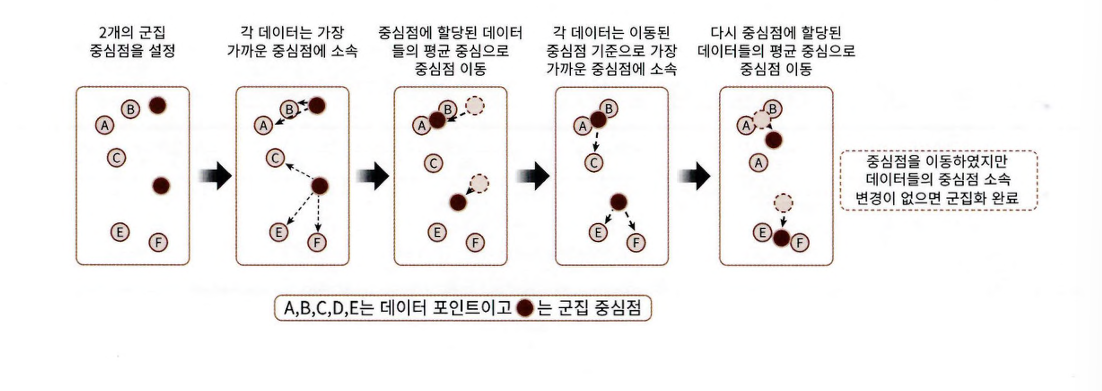


- 사이킷런 KMeans
   - 파라미터: n_clusters(군집화 중심점 개수), init='k-means++'(초기 군집 중심점 설정 방식), max_iter(최대 반복 횟수)
   - fit_transform()으로 수행(비지도 학습)
   - 주요 속성: labels_(군접 중심점 레이블), cluster_centers_(각 군집 중심점 좌표)(Shape은 [군집 개수, 피처개수 ])

- K-평균을 이용한 붓꽃 데이터 세트 군집화
   - 꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화 확인, 분류 값과 비교

- 군집화 알고리즘 테스트를 위한 데이터 생성
  - 대표 군집화용 데이터 생성기: make_blobs(), make_classification() - 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터 생성, 분류 용도 생성가능
    - make_blobs(): 개별 군집 중심점과 표준 편차 제어 기능 추가
       - 파라미터: n_samples(생성할 총 데이터 개수), n_features(데이터의 피처 개수), centers(init값, 군집의 개수/개별 중심점 좌표), cluster_std(군집 데이터의 표준 편차)
       - X,y=make_blobs(n_samples=200, n_features=2, centers=3): 총 200개의 레코드, 2개의 피처와 3개의 군집화 분포도 X 피처데이터+3개 군집화값 가지는 y타겟 데이터세트

    - make_classification(): 노이즈를 포함한 데이터 생성



- cluster_std가 작을수록 군집 중심에 데이터가 모여있음
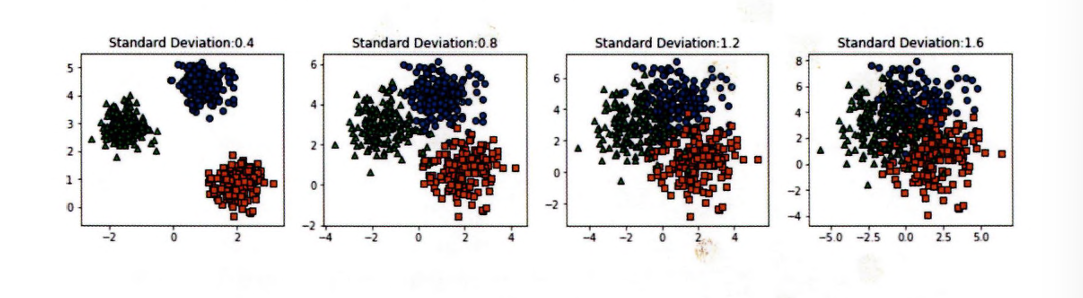

---

### **02. 군집평가**

- 군집화 데이터 세트 대부분은 비교할만한 타깃 레이블이 없고, 분류와 달리 그룹에 의미를 부여하거나 동일 분류더라도 더 세분화된 군집화 추구 / 서로 가른 분류도 더 넓은 군집화 레벨화 등의 영역

- 평가지표: 실루엣 분석(비지도학습이므로 정확한 성능 평가 어려움)

(1) 실루엣 분석

- 각 군집 간의 거리가 효율적으로 분리되어 있는지, 즉 다른 군집과는 멀리, 같은 군집간은 가깝게 뭉쳐있는지 여부

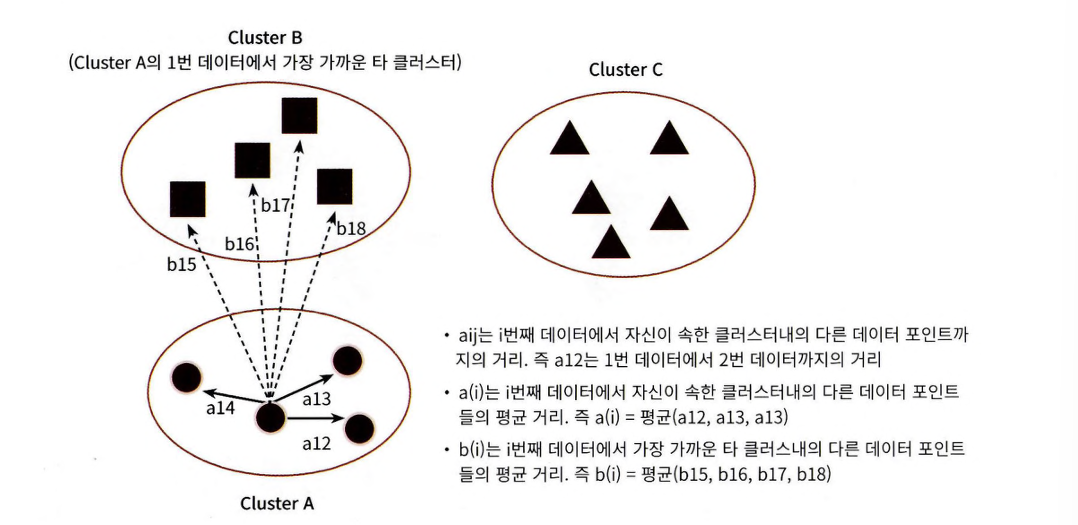

- 실루엣 계수 기반(개별 데이터가 가지는 군집화 지표)
  - a(i): 같은 군집의 다른 포인트와의 거리 평균값
  - b(i): 다른 군집 중 가까운 군집과이 평균 거리
  - b(i)-a(i): 두 군집간의 거리 / Max(a,b)로 정규화
  - i번째 실루엣 계수:
  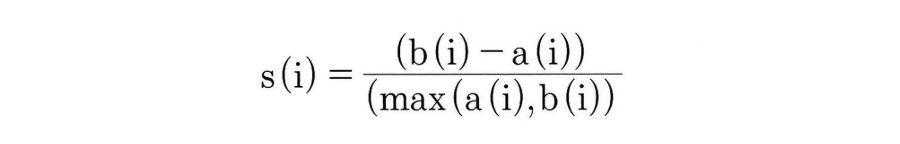

  - -1~1의 값을 가짐. 1로 가까울 수록 근처의 군집과 멀리있음을, 0에 가까울수록 가까워짐을 의미. -값은 아예 다른 군집에 데이터 포인트가 있는 것.

- 사이킷런 메서드:
  - sklearn.metrics.silhouette_samples(X, labels, metric='euclidean',**kwds): X,labels 입력하면 각 데이터 포인트의 실루엣 계수를 계산
  - sklearn.metrics.silhouette_score(X,labels, metric='euclidean',sample_size=None, **kwds): 전체 데이터의 실루엣 계수 평균값 반환. == np.mean(sklearn.samples()) 보통 값이 클수록 군집화 잘됨

- 좋은 군집화의 조건:
  1. 전체 실루엣 계수의 평균값이 0~1값을 가지면서 1에 가까울수록 좋음
  2. 개별 군집의 평균값의 편차가 크지 않아야함. 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수 평균값에서 크게 벗어나지 않아야함.



(2) 붓꽃 데이터 세트를 이용한 군집 평가

- silhouette_samples(iris.data, irisDF['cluster'])

(3) 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

- 특정 군집 내 실루엣 계수 값 높고 다른 군집은 실루엣 계수가 낮아도 평균은 높을 수 있음. 개별 군집별로 적당한 분리된 거리 유지하고 뭉쳐있는 경우에 적절한 군집개수라 판단

- 평균 실루엣 계수로 군집 개수 최적화 하기
  - 군집 개수가 2,3,4일 때 개별 군집 별 평균 실루엣 계수를 시각화해 최적의 군집 개수 찾기
    - 점선: 전체 평균 실루엣 계수 값
    - 개별 군집의 Y축 높이로 개별 데이터 실루엣 계수 추측
  - make_bolvs()로 4개 군집 중심의 데이터 세트 만들고 K-Mean으로 군집화, 2,3,4,5중 최적의 군집개수 시각화로 찾기
  - 붓꽃 데이터로도 군집화해 찾기
  - 직관적으로 이해하기 쉽지만 데이터 양이 늘어나면 수행 시간이 길어짐.

### **[코드 필사]📝**

- K-평균을 이용한 붓꽃 데이터 세트 군집화

In [1]:
# 필요 모듈 로드
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
# 데이터 세트를 3개의 그룹으로 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
# labels_로 각 데이터가 속하는 중심점확인
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
# 데이터의 target과 lables_ 값의 분류값 개수 비교
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [5]:
# 군집화 시각화
# pca로 4개의 속성을 2개로 차원축소, X,Y좌표에 개별 데이터 표현
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


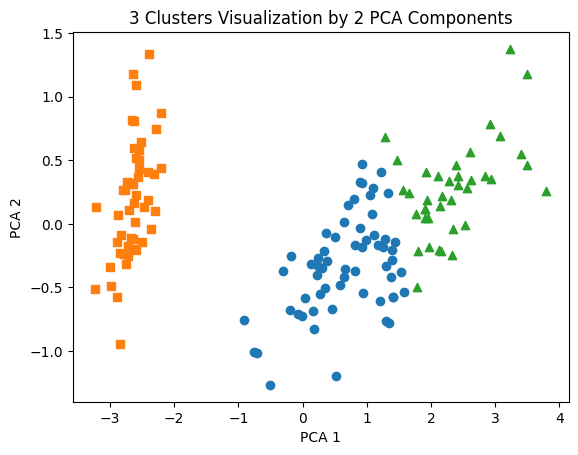

In [6]:
# 군집값이 0,1,2,인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출. o,s,^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

- 군집화 알고리즘 테스트를 위한 데이터 생성

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [3]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


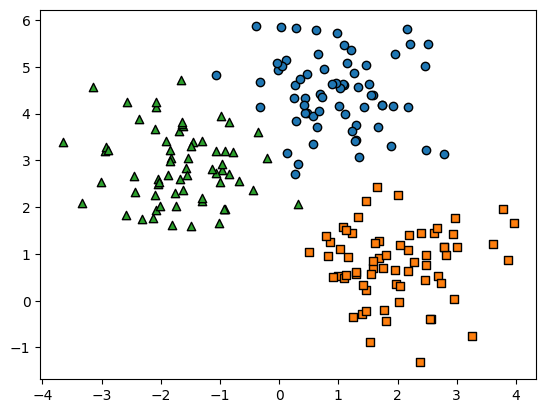

In [5]:
# make_blob()으로 만든 피처 데이터 세트의 군집화 분포 살피기
target_list = np.unique(y)

# 각 타깃별 산점도의 마커 값
markers = ['o','s','^','P','D','H','x']
# 3개의 군집 영역으로 구분으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2로 scatterplot을 marker 별 생성
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])

plt.show()

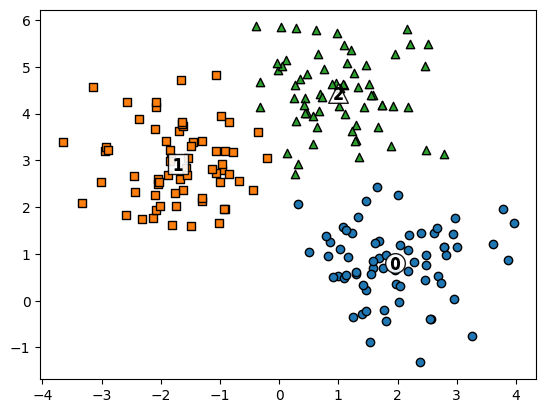

In [7]:
# KMeans 객체를 이용해 X데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=200, random_state=0)
cluster_labels= kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker = markers[label])

  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
              alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' %label)

plt.show()

In [8]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


- 붓꽃 데이터 세트를 이용한 군집 평가

In [11]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 평가 지표 값을 구하기 위한 API추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [12]:
# 군집별 평균 실루엣 계수 값을 확인
irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


- 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

In [13]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

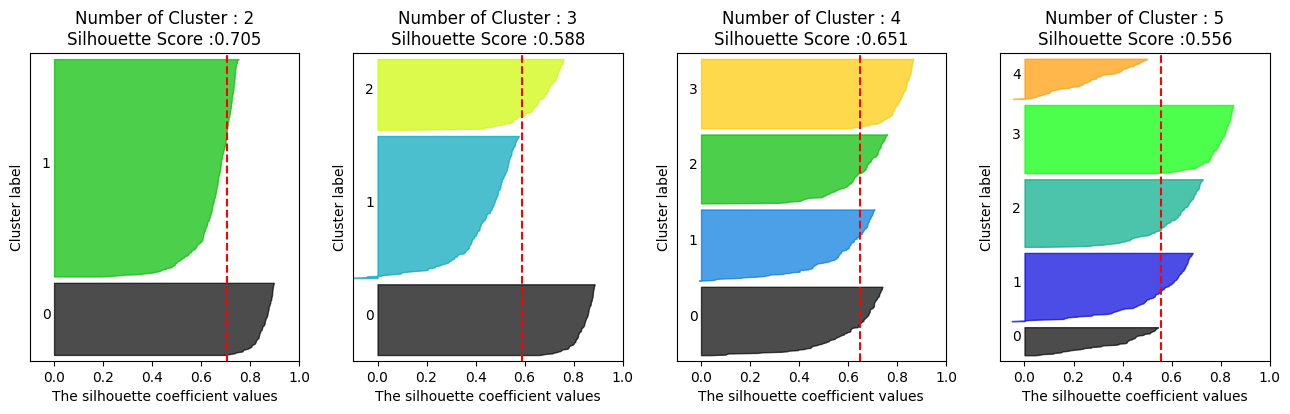

In [14]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화
visualize_silhouette([ 2, 3, 4, 5], X)

In [17]:
# 군집 개수 4일 때가 가장 이상적임

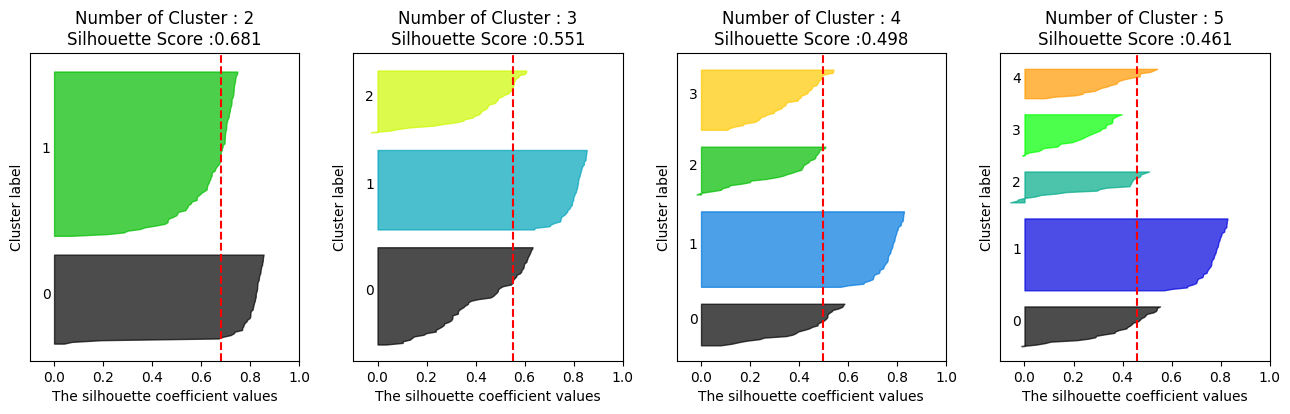

In [15]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

In [18]:
# 군집 개수 2일 때가 가장 이상적